In [3]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, RobustScaler

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_o = pd.read_csv('~/python3_script/machineLearning/house_price/houseprice_train.csv')

In [6]:
train_y = train_o['SalePrice']
train_o = train_o.iloc[:, 1:-1]

In [7]:
for i in train_o:
    if train_o[i].dtype.kind == 'O':
        train_o[i] = train_o[i].replace(np.nan, 'not')
print(train_o['LotShape'].dtype.kind)
print(train_o)

O
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   not      Reg   
1             20       RL         80.0     9600   Pave   not      Reg   
2             60       RL         68.0    11250   Pave   not      IR1   
3            190       RL         50.0     7420   Pave   not      Reg   
4             20       RL         70.0    11200   Pave   not      Reg   
5             60       RL         85.0    11924   Pave   not      IR1   
6             20       RL          NaN    12968   Pave   not      IR2   
7             20       RL         91.0    10652   Pave   not      IR1   
8             20       RL          NaN    10920   Pave   not      IR1   
9             45       RM         51.0     6120   Pave   not      Reg   
10            20       RL          NaN     8246   Pave   not      IR1   
11            20       RL        110.0    14230   Pave   not      Reg   
12            20       RL         60.0     7200  

In [8]:
def map_values(df):
    df['MSSubClass'] = df['MSSubClass'].map({'180':1,
                                             '30':2, '45':2,
                                             '190':3, '50':3, '90':3, 
                                             '85':4, '40':4, '160':4, 
                                             '70':5, '20':5, '75':5, '80':5, '150':5,
                                             '120': 6, '60':6})
    df['MSZoning'] = df['MSZoning'].map({'C (all)':1, 'RM':2, 'RH':2, 'RL':3, 'FV':4})
    df['Neighborhood'] = df['Neighborhood'].map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn':1, 'None':1, 'not':2, 'BrkFace':2, 'Stone':3})
    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['Foundation'] = df['Foundation'].map({'Slab':1, 'BrkTil':2, 'CBlock':2, 'Stone':2, 'Wood':3, 'PConc':4})
    df['BsmtQual'] = df['BsmtQual'].map({'not':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    df['BsmtCond'] = df['BsmtCond'].map({'not':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    df['BsmtExposure'] = df['BsmtExposure'].map({'not':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})
    df['BsmtFinType1'] = df['BsmtFinType1'].map({'not':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})
    df['BsmtFinType2'] = df['BsmtFinType2'].map({'not':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})
    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['Functional'] = df['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    df['FireplaceQu'] = df['FireplaceQu'].map({'not':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    df['GarageFinish'] = df['GarageFinish'].map({'not':1, 'Unf':2, 'RFn':3, 'Fin':4})
    df['GarageQual'] = df['GarageQual'].map({'not':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    df['GarageCond'] = df['GarageCond'].map({'not':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    df['PavedDrive'] = df['PavedDrive'].map({'N':1, 'P':2, 'Y':3})
    df['PoolQC'] = df['PoolQC'].map({'not':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['Fence'] = df['Fence'].map({'not':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})

In [9]:
def map_values2(df):
    df['Alley'] = df['Alley'].map({'not':1, 'Grvl':1, 'Pave':2, 'not':2})
    df['LotShape'] = df['LotShape'].map({'Reg':1, 'IR1':2, 'IR3':2, 'IR2':2})
    df['LandContour'] = df['LandContour'].map({'Bnk':1, 'Lvl':2, 'Low':3, 'HLS':4})
    df['LotConfig'] = df['LotConfig'].map({'Inside':1, 'Corner':1, 'FR2':1, 'CulDSac':2, 'FR3':2})
    df['LandSlope'] = df['LandSlope'].map({'Gtl':1, 'Sev':2, 'Mod':3})
    df['Condition1'] = df['Condition1'].map({'Artery':1, 'Feedr':2, 'RRAe':2, 'Norm':3, 'RRAn':3, 'PosA':4, 'RRNe':4, 'PosN':4, 'RRNn':5})
    df['Condition2'] = df['Condition2'].map({'Artery':1, 'RRNn':2, 'Feedr':2, 'Norm':3, 'RRAn':3, 'PosA':4, 'RRAe':4, 'PosN':4})
    df['BldgType'] = df['BldgType'].map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    df['RoofStyle'] = df['RoofStyle'].map({'Gambrel':1, 'Gable':2, 'Flat':2, 'Hip':2, 'Mansard':3, 'Shed':3})
    df['RoofMatl'] = df['RoofMatl'].map({'ClyTile':1, 'Roll':1, 'CompShg':1, 'Tar&Grv':1, 'Metal':1, 'WdShake':2, 'WdShngl':2})
    df['Heating'] = df['Heating'].map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':4})
    df['CentralAir'] = df['CentralAir'].map({'N':1, 'Y':2})
    df['Electrical'] = df['Electrical'].map({'not':1, 'Mix':1, 'FuseP':1, 'FuseA':2, 'FuseF':2, 'SBrkr':3})
    df['GarageType'] = df['GarageType'].map({'not':1, 'CarPort':2, 'Detchd':3, 'Basment':4, '2Types':4, 'Attchd':5, 'BuiltIn':5})
    df['MiscFeature'] = df['MiscFeature'].map({'not':1, 'Shed':2, 'Gar2':3, 'Othr':3, 'Othr':4})
    df['SaleType'] = df['SaleType'].map({'Oth':1, 'ConLw':2, 'ConLD':2, 'COD':2, 'WD':3, 'ConLI':3, 'CWD':4, 'New':4, 'Con':5})
    df['SaleCondition'] = df['SaleCondition'].map({'AdjLand':1, 'Abnorml':2, 'Family':2, 'Alloca':2, 'Normal':3, 'Partial':4})

In [10]:
train_o.MSSubClass = train_o.MSSubClass.astype(str)
map_values(train_o)
map_values2(train_o)

In [11]:
print(train_o.dtypes.tolist())
if 'O' in train_o.dtypes.tolist():
        for i in train_o:
            if train_o[i].dtype.kind == 'O':
                print(i)
                train_o[i] = LabelEncoder().fit_transform(train_o[i])

[dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), d

In [12]:
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
nan_count = train_o.isnull().sum()
nan_index = nan_count[nan_count>0].index
train_o[nan_index]= imputer.fit_transform(train_o[nan_index])

/home/LAB/wanghm18/miniconda3/envs/machineLearning/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

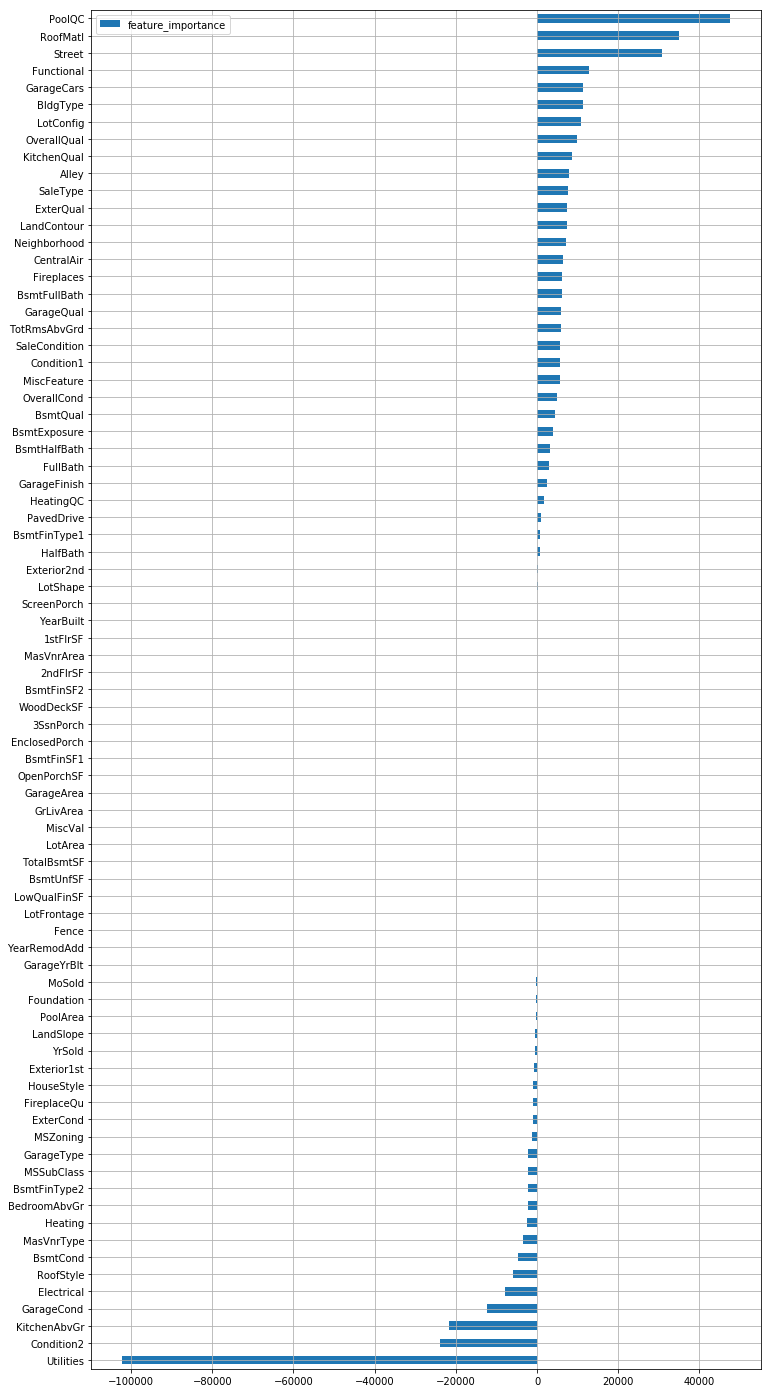

In [13]:
lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(train_o, train_y)
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=train_o.columns)
lasso_fi.sort_values('feature_importance', ascending=False)
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
plt.show()